# Data read

In [114]:
import numpy as np 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
all_data = pd.read_csv('Data.csv')
all_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


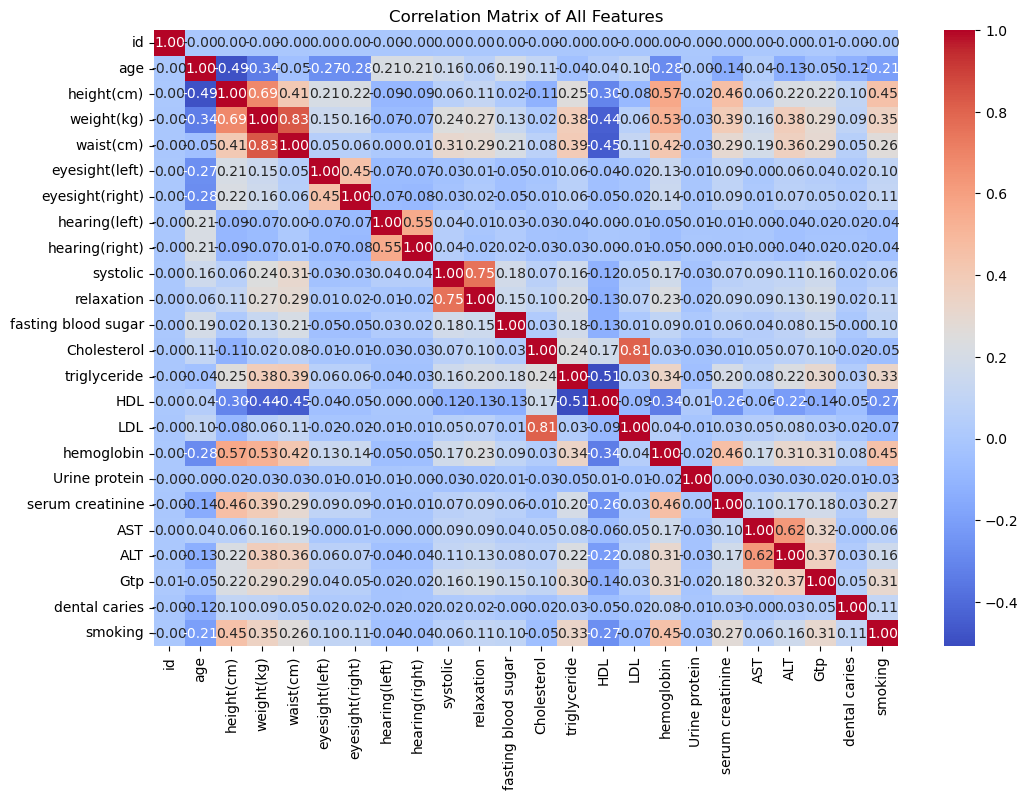

In [116]:
correlation_matrix = all_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

In [117]:
selected_columns = all_data[['HDL','LDL','height(cm)', 'triglyceride']]
selected_columns.head()

,HDL,LDL,height(cm),triglyceride
0,40,75,165,300
1,57,126,165,55
2,45,93,170,197
3,38,102,180,203
4,44,93,165,87


In [118]:
data = pd.read_csv('your_data.csv')
data.head()

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking
0,0,1.0,25,81.0,87,0,1,1,0,16.5,60,1
1,1,1.1,23,89.0,83,1,2,1,1,16.2,65,0
2,2,0.8,31,81.0,75,2,1,1,0,17.4,75,1
3,3,1.0,27,105.0,88,3,1,1,1,15.9,95,0
4,4,0.8,13,80.5,76,4,1,1,0,15.4,60,1


In [119]:
data = pd.concat([data, selected_columns], axis=1)
data.head()

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking,HDL,LDL,height(cm),triglyceride
0,0,1.0,25,81.0,87,0,1,1,0,16.5,60,1,40,75,165,300
1,1,1.1,23,89.0,83,1,2,1,1,16.2,65,0,57,126,165,55
2,2,0.8,31,81.0,75,2,1,1,0,17.4,75,1,45,93,170,197
3,3,1.0,27,105.0,88,3,1,1,1,15.9,95,0,38,102,180,203
4,4,0.8,13,80.5,76,4,1,1,0,15.4,60,1,44,93,165,87


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        159256 non-null  int64  
 1   serum creatinine  159256 non-null  float64
 2   ALT               159256 non-null  int64  
 3   waist(cm)         159256 non-null  float64
 4   relaxation        159256 non-null  int64  
 5   id                159256 non-null  int64  
 6   hearing(left)     159256 non-null  int64  
 7   Urine protein     159256 non-null  int64  
 8   dental caries     159256 non-null  int64  
 9   hemoglobin        159256 non-null  float64
 10  weight(kg)        159256 non-null  int64  
 11  smoking           159256 non-null  int64  
 12  HDL               159256 non-null  int64  
 13  LDL               159256 non-null  int64  
 14  height(cm)        159256 non-null  int64  
 15  triglyceride      159256 non-null  int64  
dtypes: float64(3), int64

In [121]:
data.isna().sum()

Unnamed: 0          0
serum creatinine    0
ALT                 0
waist(cm)           0
relaxation          0
id                  0
hearing(left)       0
Urine protein       0
dental caries       0
hemoglobin          0
weight(kg)          0
smoking             0
HDL                 0
LDL                 0
height(cm)          0
triglyceride        0
dtype: int64

In [122]:
data.duplicated().sum()

0

In [123]:
data.describe()

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking,HDL,LDL,height(cm),triglyceride
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,0.892764,26.550296,83.001990,76.874071,79627.500000,1.023974,1.074233,0.197996,14.796965,67.143662,0.437365,55.852684,114.607682,165.266929,127.616046
std,45973.391572,0.179346,17.753070,8.957937,8.994642,45973.391572,0.152969,0.347856,0.398490,1.431213,12.586198,0.496063,13.964141,28.158931,8.818970,66.188989
min,0.000000,0.100000,1.000000,51.000000,44.000000,0.000000,1.000000,1.000000,0.000000,4.900000,30.000000,0.000000,9.000000,1.000000,135.000000,8.000000
25%,39813.750000,0.800000,16.000000,77.000000,70.000000,39813.750000,1.000000,1.000000,0.000000,13.800000,60.000000,0.000000,45.000000,95.000000,160.000000,77.000000
50%,79627.500000,0.900000,22.000000,83.000000,78.000000,79627.500000,1.000000,1.000000,0.000000,15.000000,65.000000,0.000000,54.000000,114.000000,165.000000,115.000000
75%,119441.250000,1.000000,32.000000,89.000000,82.000000,119441.250000,1.000000,1.000000,0.000000,15.800000,75.000000,1.000000,64.000000,133.000000,170.000000,165.000000
max,159255.000000,9.900000,2914.000000,127.000000,133.000000,159255.000000,2.000000,6.000000,1.000000,21.000000,130.000000,1.000000,136.000000,1860.000000,190.000000,766.000000


In [124]:
numerical_columns = data.columns
numerical_columns = numerical_columns[numerical_columns != 'id']
numerical_columns = numerical_columns[numerical_columns != 'Unnamed: 0']  # Exclude 'id'
for column in numerical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

Value counts for serum creatinine:
serum creatinine
0.9    35776
1.0    31313
0.8    29802
0.7    19782
1.1    17830
0.6    11153
1.2     7657
0.5     2624
1.3     2123
1.4      604
0.4      311
1.5      137
1.6       58
0.1       17
1.8       15
1.9       12
1.7       11
2.0        7
0.3        5
2.1        4
2.5        3
0.2        3
2.2        3
5.9        2
3.0        1
3.4        1
9.9        1
7.4        1
Name: count, dtype: int64


Value counts for ALT:
ALT
15     7337
16     7226
18     6890
17     6805
19     6757
       ... 
178       1
161       1
176       1
216       1
134       1
Name: count, Length: 188, dtype: int64


Value counts for waist(cm):
waist(cm)
80.0     6572
86.0     6026
84.0     5986
82.0     5962
81.0     5619
         ... 
107.7       1
106.2       1
57.5        1
63.6        1
56.3        1
Name: count, Length: 531, dtype: int64


Value counts for relaxation:
relaxation
80     20326
70     16878
78     10258
74      5924
72      5875
       ...  
44    

# Nsheel el Outliers

In [125]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    print(f"Number of rows before removing outliers in {column}: {data.shape[0]}")
    data = remove_outliers_iqr(data, column)
    print(f"Number of rows after removing outliers in {column}: {data.shape[0]}")

data.reset_index(drop=True, inplace=True)
data.head()

Number of rows before removing outliers in serum creatinine: 159256
Number of rows after removing outliers in serum creatinine: 153313
Number of rows before removing outliers in ALT: 153313
Number of rows after removing outliers in ALT: 147748
Number of rows before removing outliers in waist(cm): 147748
Number of rows after removing outliers in waist(cm): 146762
Number of rows before removing outliers in relaxation: 146762
Number of rows after removing outliers in relaxation: 145897
Number of rows before removing outliers in hearing(left): 145897
Number of rows after removing outliers in hearing(left): 142354
Number of rows before removing outliers in Urine protein: 142354
Number of rows after removing outliers in Urine protein: 134861
Number of rows before removing outliers in dental caries: 134861
Number of rows after removing outliers in dental caries: 107916
Number of rows before removing outliers in hemoglobin: 107916
Number of rows after removing outliers in hemoglobin: 107092
Nu

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking,HDL,LDL,height(cm),triglyceride
0,2,0.8,31,81.0,75,2,1,1,0,17.4,75,1,45,93,170,197
1,4,0.8,13,80.5,76,4,1,1,0,15.4,60,1,44,93,165,87
2,6,0.7,12,69.0,88,6,1,1,0,13.0,55,0,69,122,160,153
3,8,0.9,21,89.0,80,8,1,1,0,15.7,70,1,59,150,165,163
4,9,0.7,16,73.0,70,9,1,1,0,13.2,50,0,55,122,155,27


Number of rows before removing outliers in Unnamed: 0: 103306
Number of rows after removing outliers in Unnamed: 0: 103306
Number of rows before removing outliers in serum creatinine: 103306
Number of rows after removing outliers in serum creatinine: 103306
Number of rows before removing outliers in ALT: 103306
Number of rows after removing outliers in ALT: 101303
Number of rows before removing outliers in waist(cm): 101303
Number of rows after removing outliers in waist(cm): 101219
Number of rows before removing outliers in relaxation: 101219
Number of rows after removing outliers in relaxation: 101219
Number of rows before removing outliers in id: 101219
Number of rows after removing outliers in id: 101219
Number of rows before removing outliers in hearing(left): 101219
Number of rows after removing outliers in hearing(left): 101219
Number of rows before removing outliers in Urine protein: 101219
Number of rows after removing outliers in Urine protein: 101219
Number of rows before re

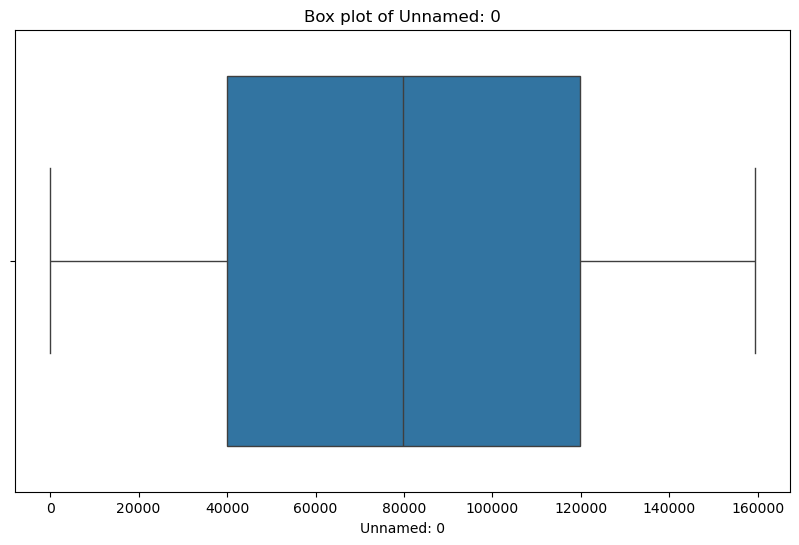

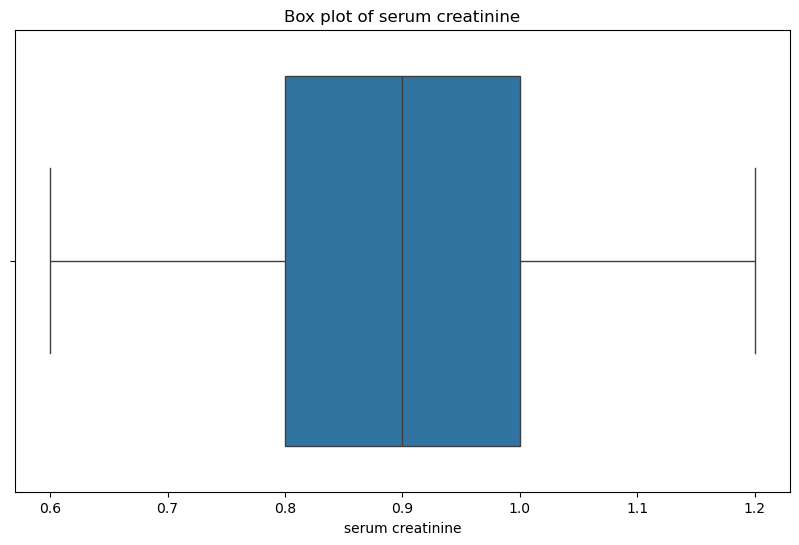

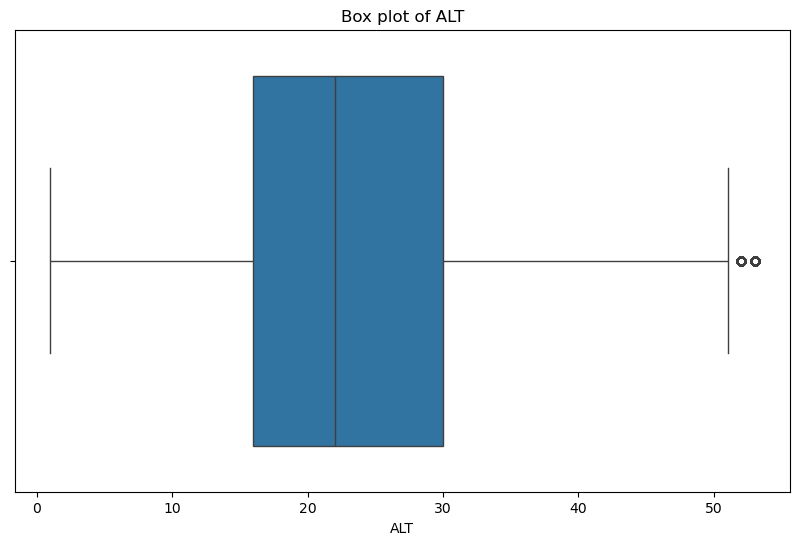

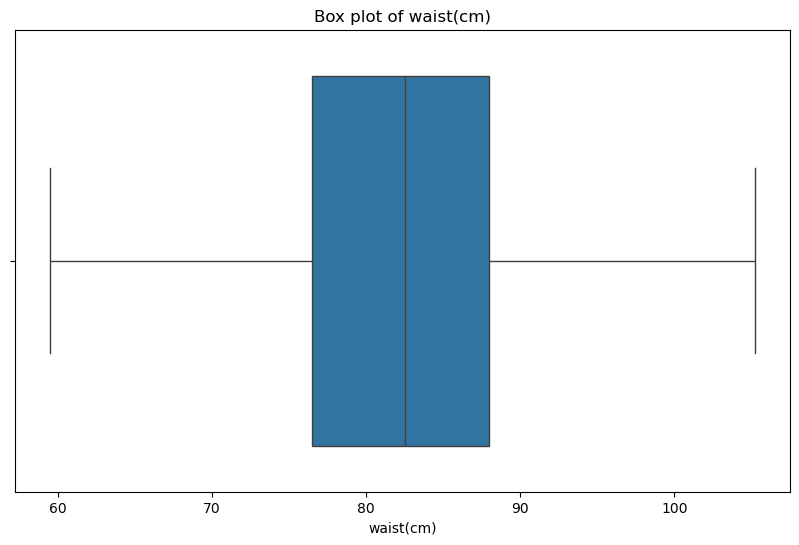

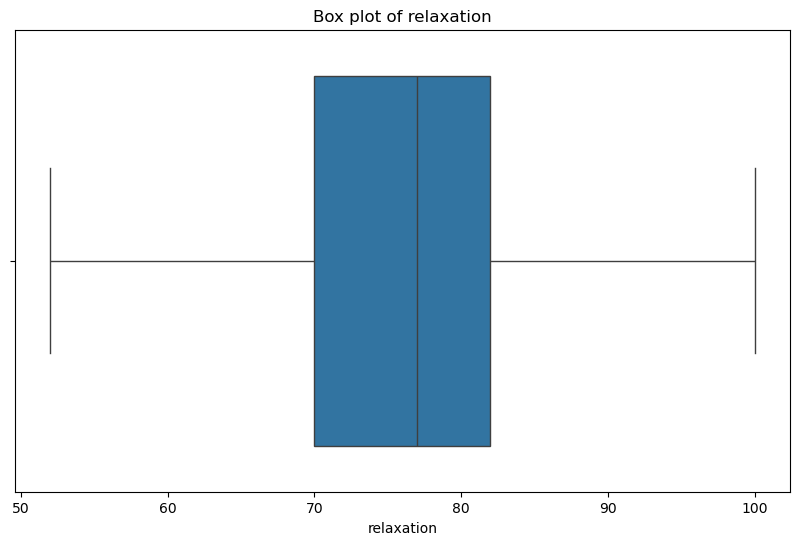

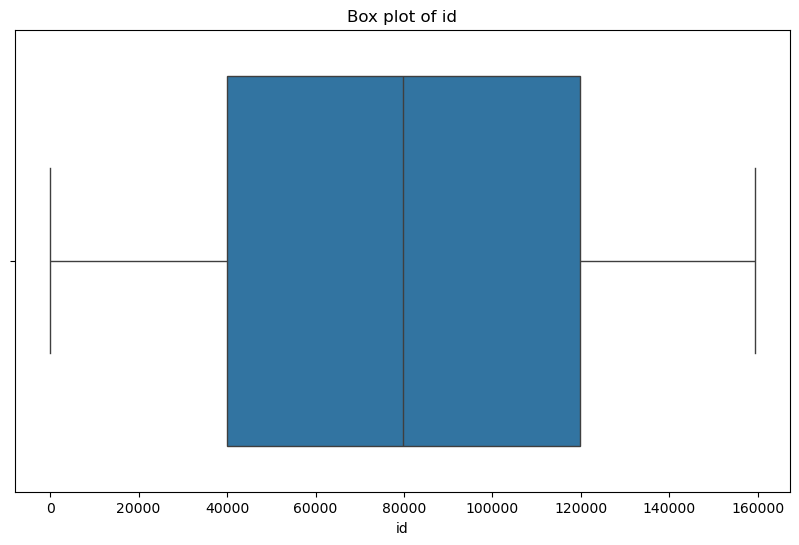

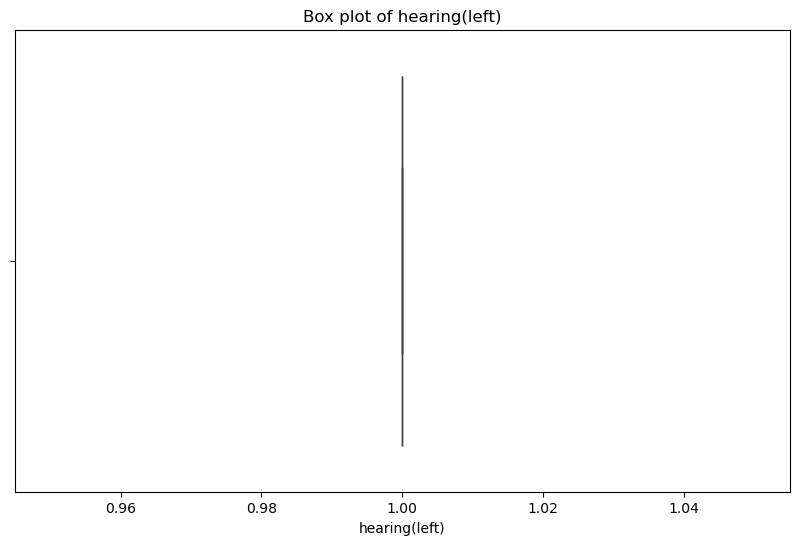

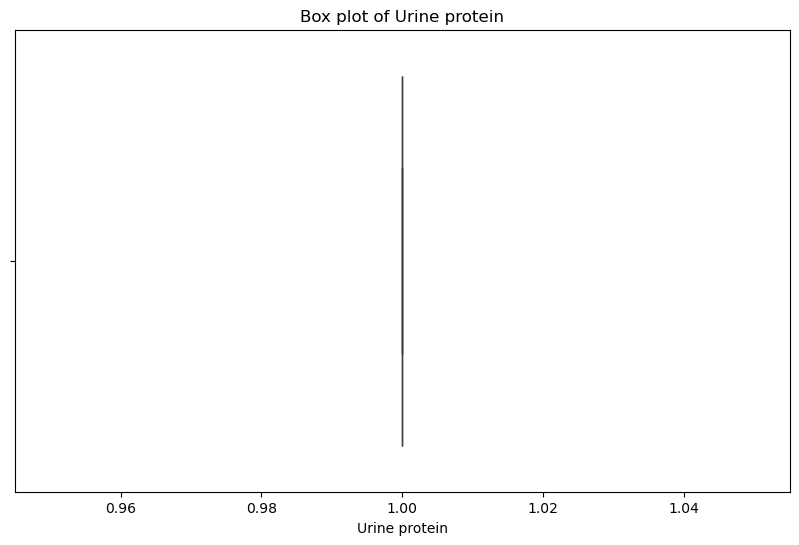

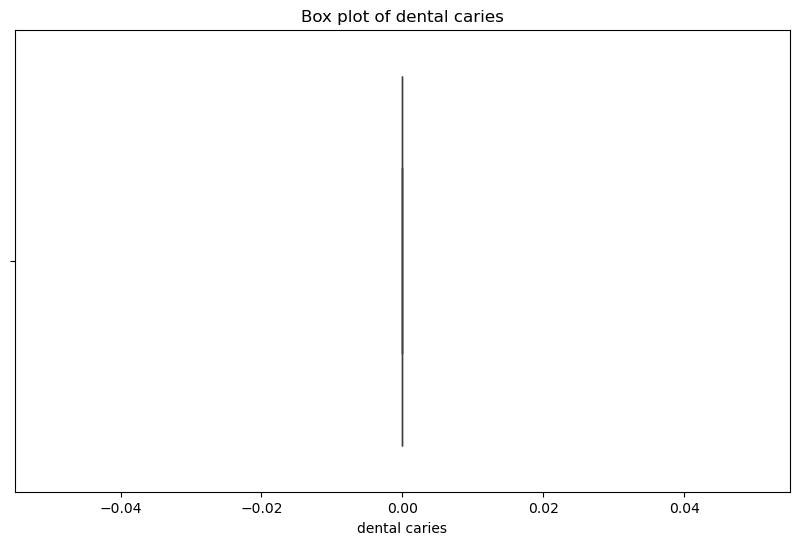

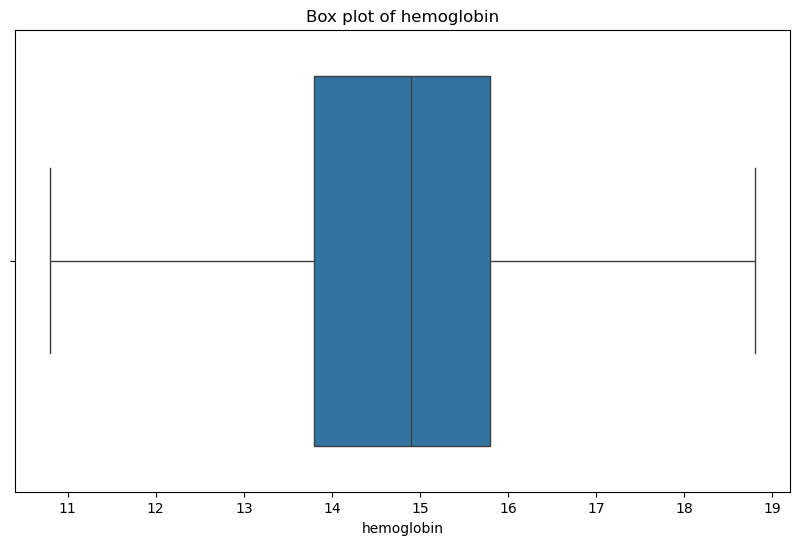

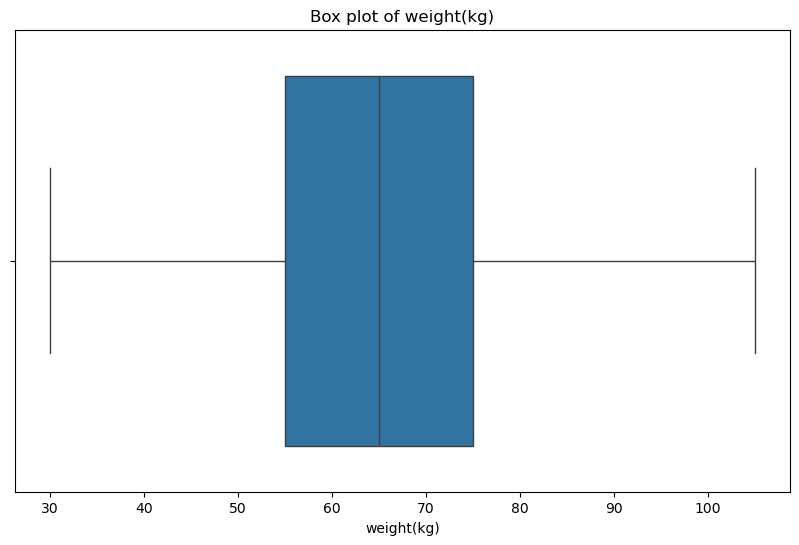

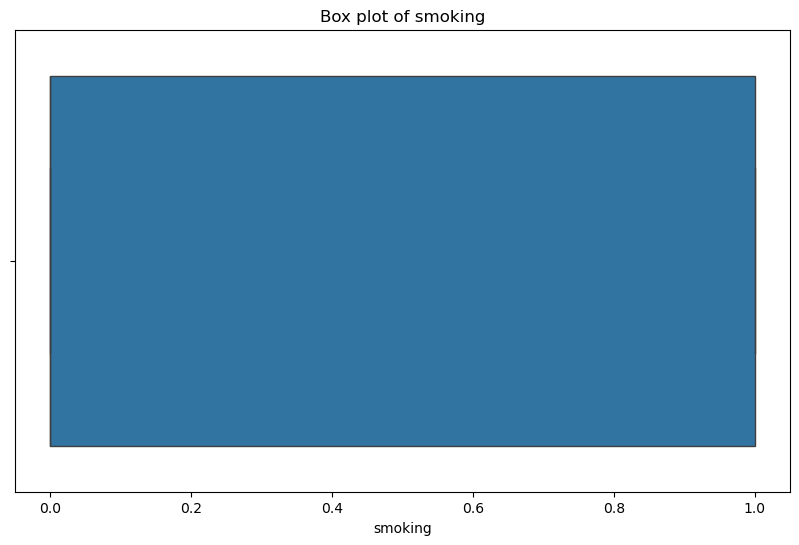

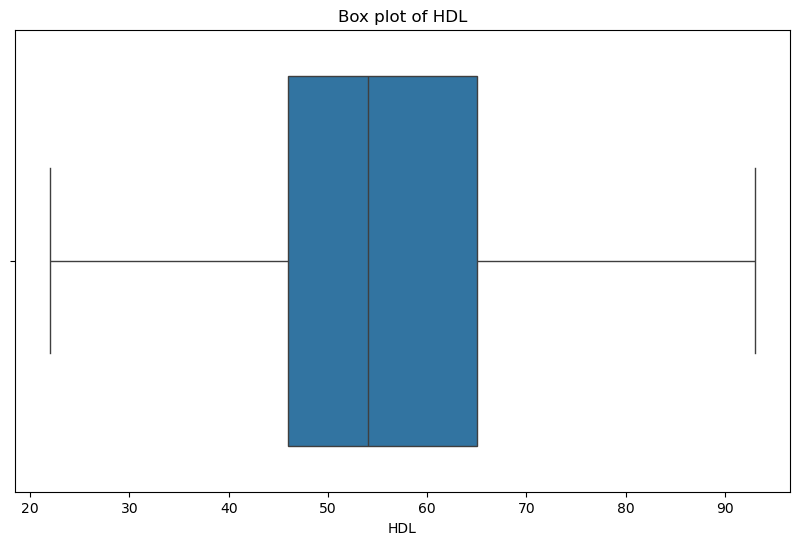

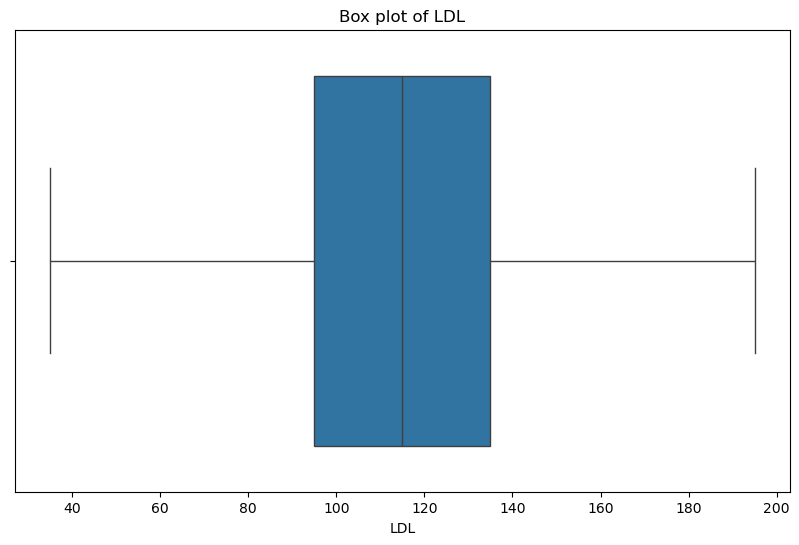

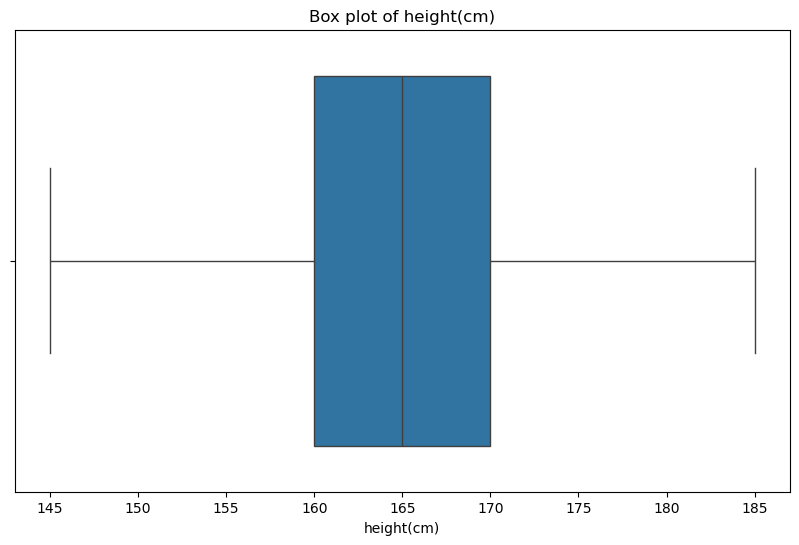

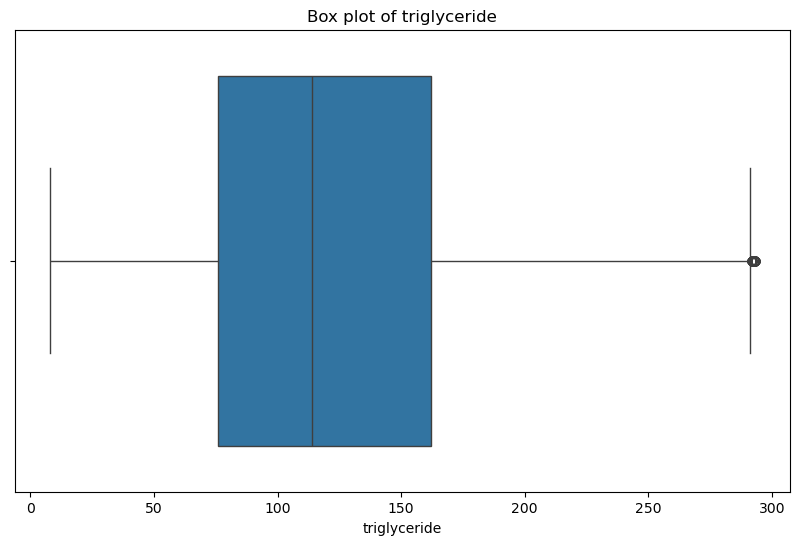

In [126]:
# Apply the IQR outlier removal function to all columns
for column in data.columns:
    print(f"Number of rows before removing outliers in {column}: {data.shape[0]}")
    data = remove_outliers_iqr(data, column)
    print(f"Number of rows after removing outliers in {column}: {data.shape[0]}")

# Function to plot box plots for each column
def plot_box_plots(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

# Plot box plots for each column in the data
plot_box_plots(data)

In [127]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column and print the number of rows before and after removing outliers
for column in numerical_columns:
    print(f"Number of rows before removing outliers in {column}: {data.shape[0]}")
    data = remove_outliers_iqr(data, column)
    print(f"Number of rows after removing outliers in {column}: {data.shape[0]}")

data.reset_index(drop=True, inplace=True)
data.head()

Number of rows before removing outliers in serum creatinine: 100873
Number of rows after removing outliers in serum creatinine: 100873
Number of rows before removing outliers in ALT: 100873
Number of rows after removing outliers in ALT: 99817
Number of rows before removing outliers in waist(cm): 99817
Number of rows after removing outliers in waist(cm): 99817
Number of rows before removing outliers in relaxation: 99817
Number of rows after removing outliers in relaxation: 99817
Number of rows before removing outliers in hearing(left): 99817
Number of rows after removing outliers in hearing(left): 99817
Number of rows before removing outliers in Urine protein: 99817
Number of rows after removing outliers in Urine protein: 99817
Number of rows before removing outliers in dental caries: 99817
Number of rows after removing outliers in dental caries: 99817
Number of rows before removing outliers in hemoglobin: 99817
Number of rows after removing outliers in hemoglobin: 99657
Number of rows 

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking,HDL,LDL,height(cm),triglyceride
0,2,0.8,31,81.0,75,2,1,1,0,17.4,75,1,45,93,170,197
1,4,0.8,13,80.5,76,4,1,1,0,15.4,60,1,44,93,165,87
2,6,0.7,12,69.0,88,6,1,1,0,13.0,55,0,69,122,160,153
3,8,0.9,21,89.0,80,8,1,1,0,15.7,70,1,59,150,165,163
4,9,0.7,16,73.0,70,9,1,1,0,13.2,50,0,55,122,155,27


# Feature engineering

In [128]:
# Create a new feature 'Cholesterol_Ratio' based on 'HDL' and 'LDL'
data['Cholesterol_Ratio'] = data['HDL'] / data['LDL']

data['Height_to_Waist_Ratio'] = data['height(cm)'] / data['waist(cm)']

# Create a new feature 'Hemoglobin_Level' based on 'hemoglobin'
data['Hemoglobin_Level'] = pd.cut(data['hemoglobin'], bins=[0, 12, 16, np.inf], labels=False)

# Create a new feature 'BMI' (Body Mass Index) based on 'weight(kg)' and 'waist(cm)'
data['BMI'] = data['weight(kg)'] / (data['waist(cm)'] / 100) ** 2

In [129]:
data.head()

,Unnamed: 0,serum creatinine,ALT,waist(cm),relaxation,id,hearing(left),Urine protein,dental caries,hemoglobin,weight(kg),smoking,HDL,LDL,height(cm),triglyceride,Cholesterol_Ratio,Height_to_Waist_Ratio,Hemoglobin_Level,BMI
0,2,0.8,31,81.0,75,2,1,1,0,17.4,75,1,45,93,170,197,0.483871,2.098765,2,114.311843
1,4,0.8,13,80.5,76,4,1,1,0,15.4,60,1,44,93,165,87,0.473118,2.049689,1,92.589020
2,6,0.7,12,69.0,88,6,1,1,0,13.0,55,0,69,122,160,153,0.565574,2.318841,1,115.521949
3,8,0.9,21,89.0,80,8,1,1,0,15.7,70,1,59,150,165,163,0.393333,1.853933,1,88.372680
4,9,0.7,16,73.0,70,9,1,1,0,13.2,50,0,55,122,155,27,0.450820,2.123288,1,93.826234


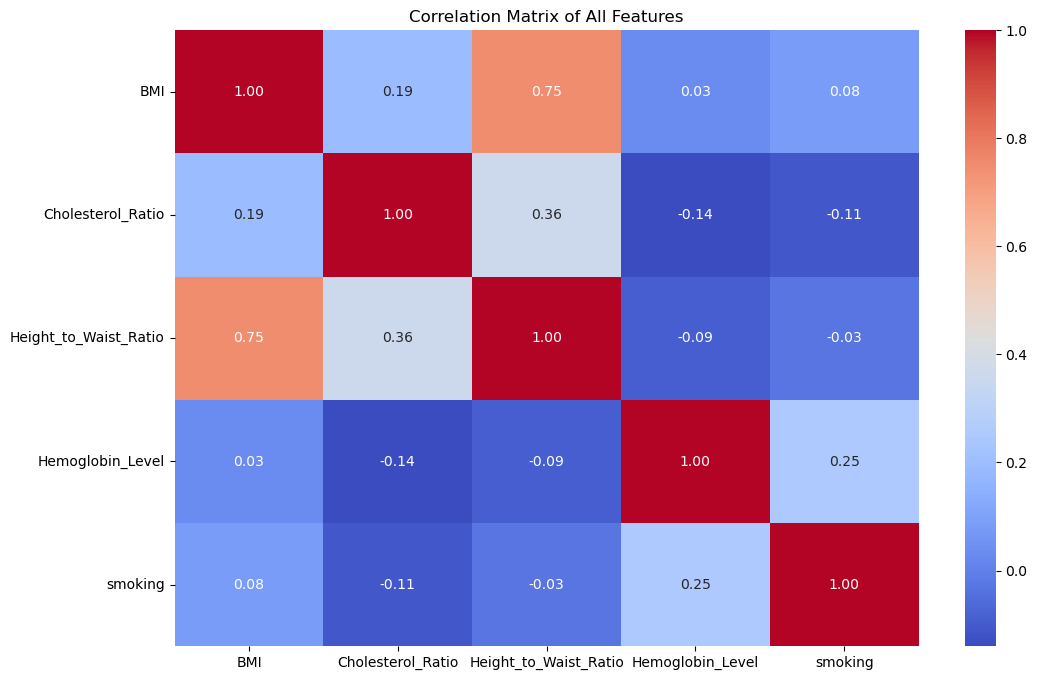

In [130]:
correlation_matrix = data[['BMI','Cholesterol_Ratio','Height_to_Waist_Ratio','Hemoglobin_Level','smoking']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

Correlation Matrix:
                       Unnamed: 0  serum creatinine       ALT  waist(cm)  \
Unnamed: 0               1.000000         -0.002836  0.000144  -0.001749   
serum creatinine        -0.002836          1.000000  0.205380   0.290516   
ALT                      0.000144          0.205380  1.000000   0.400954   
waist(cm)               -0.001749          0.290516  0.400954   1.000000   
relaxation              -0.002263          0.085613  0.139436   0.276620   
id                       1.000000         -0.002836  0.000144  -0.001749   
hearing(left)                 NaN               NaN       NaN        NaN   
Urine protein                 NaN               NaN       NaN        NaN   
dental caries                 NaN               NaN       NaN        NaN   
hemoglobin               0.001876          0.489631  0.357658   0.401575   
weight(kg)               0.000288          0.409959  0.406512   0.813143   
smoking                  0.000033          0.286267  0.179979   0.24

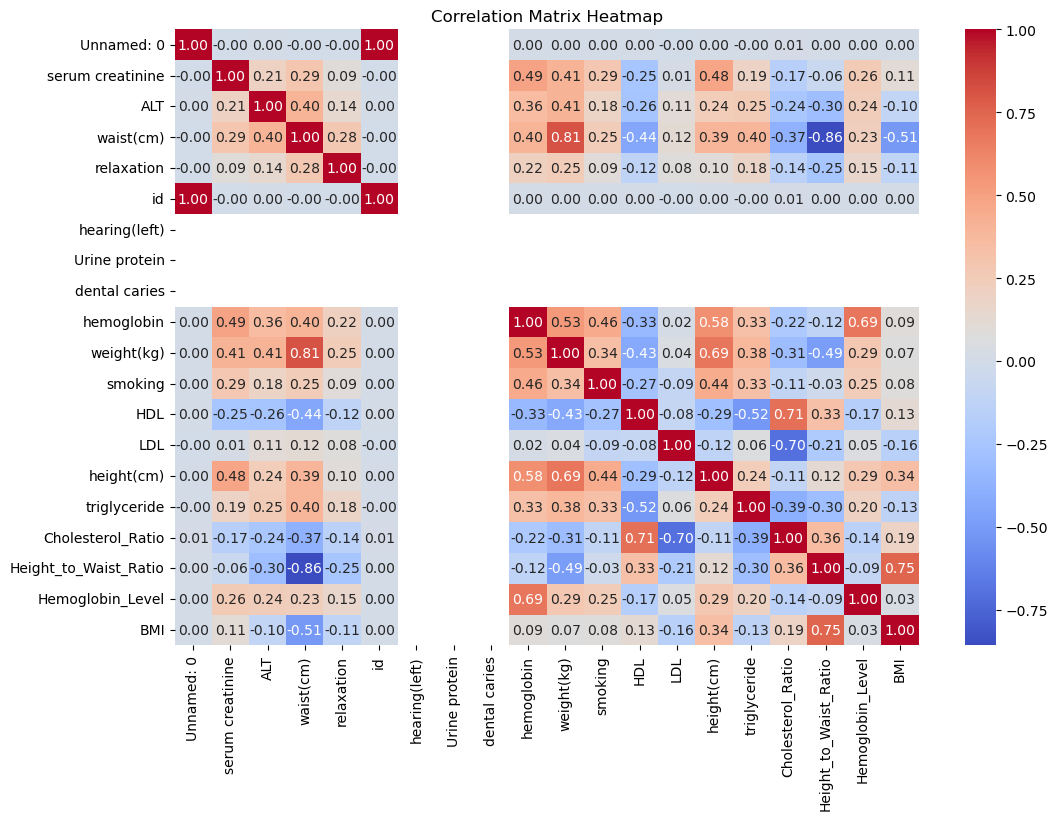

Top 5 features most correlated with 'smoking':
hemoglobin          0.455228
height(cm)          0.444566
weight(kg)          0.342617
triglyceride        0.332112
serum creatinine    0.286267
Name: smoking, dtype: float64


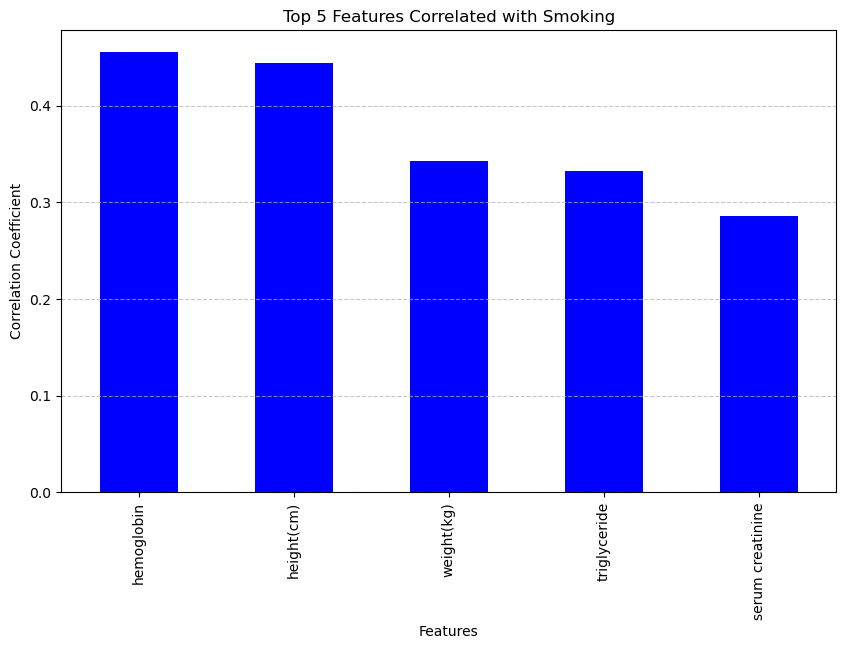

In [131]:
# Correlation Analysis
#print(data.dtypes)
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify the top 5 features that are most correlated with the target variable 'smoking'
correlation_with_target = correlation_matrix['smoking'].drop('smoking').sort_values(ascending=False)
top_5_correlated_features = correlation_with_target.head(5)

# Display the top 5 correlated features
print("Top 5 features most correlated with 'smoking':")
print(top_5_correlated_features)

# Plot the correlation of the top 5 features with the target variable 'smoking'
plt.figure(figsize=(10, 6))
top_5_correlated_features.plot(kind='bar', color='blue')
plt.title('Top 5 Features Correlated with Smoking')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
# Preprocess the data
# Assuming 'smoking' is the target variable and the rest are features
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)



In [31]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)


c:\Users\samir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [35]:
# Predict on the validation data
y_valid_pred_logistic = logistic_model.predict(X_valid)


In [36]:
# Print classification report
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_valid, y_valid_pred_logistic))

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      8672
           1       0.68      0.64      0.66      6268

    accuracy                           0.72     14940
   macro avg       0.71      0.71      0.71     14940
weighted avg       0.72      0.72      0.72     14940



Confusion Matrix for Logistic Regression Model:
[[6729 1943]
 [2228 4040]]


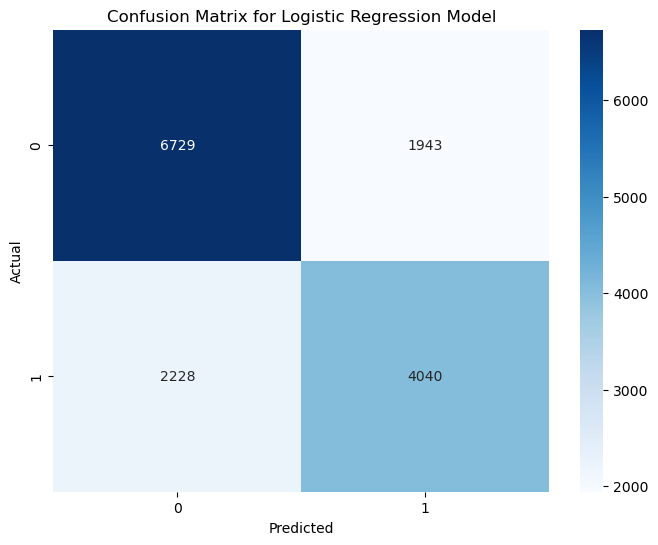

In [ ]:
# Generate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_valid, y_valid_pred_logistic)
print("Confusion Matrix for Logistic Regression Model:")
print(conf_matrix_logistic)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


=== Decision Tree Model Performance ===

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.76     11600
           1       0.67      0.76      0.71      8320

    accuracy                           0.74     19920
   macro avg       0.74      0.74      0.74     19920
weighted avg       0.75      0.74      0.74     19920


Confusion Matrix:
[[8434 3166]
 [2026 6294]]

Feature Importance:
            feature  importance
0        height(cm)    0.725829
5        hemoglobin    0.140733
6      triglyceride    0.125172
2  serum creatinine    0.008266
1        weight(kg)    0.000000
3               HDL    0.000000
4               LDL    0.000000


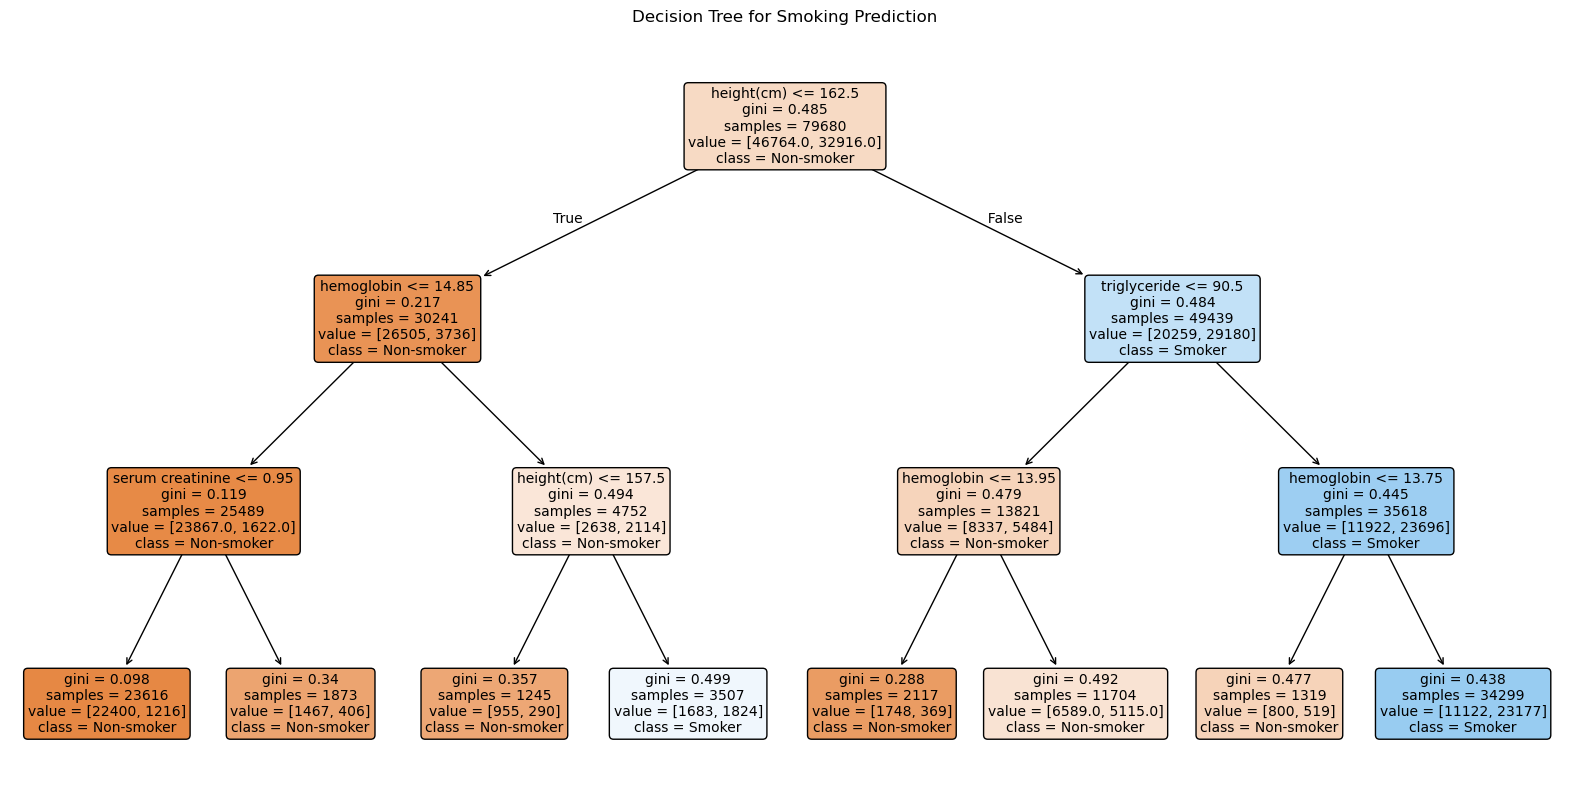

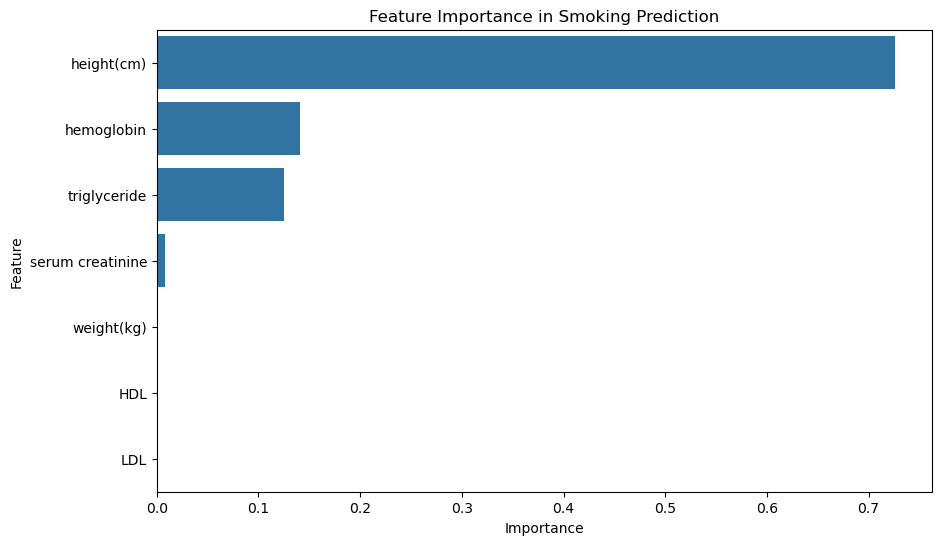

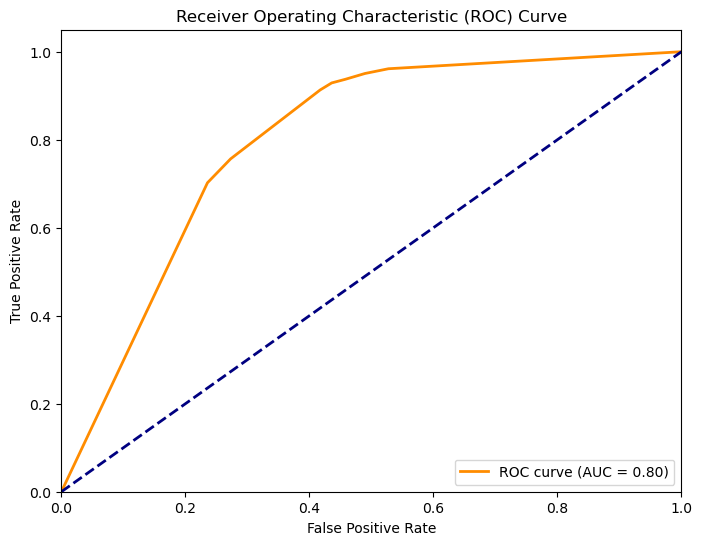


Cross-validation scores: [0.74216867 0.73960843 0.7375502  0.74307229 0.73659639]
Average CV score: 0.740 (+/- 0.005)

Example Predictions:

Example 1:
Features:
height(cm): 165.00
weight(kg): 55.00
serum creatinine: 0.90
HDL: 50.00
LDL: 100.00
hemoglobin: 15.50
triglyceride: 150.00
Predicted: Smoker
Probability of being a smoker: 0.68

Example 2:
Features:
height(cm): 165.00
weight(kg): 60.00
serum creatinine: 0.80
HDL: 57.00
LDL: 151.00
hemoglobin: 16.50
triglyceride: 218.00
Predicted: Smoker
Probability of being a smoker: 0.68

Example 3:
Features:
height(cm): 155.00
weight(kg): 60.00
serum creatinine: 0.90
HDL: 75.00
LDL: 100.00
hemoglobin: 12.80
triglyceride: 97.00
Predicted: Non-smoker
Probability of being a smoker: 0.05

Example 4:
Features:
height(cm): 165.00
weight(kg): 65.00
serum creatinine: 0.90
HDL: 50.00
LDL: 132.00
hemoglobin: 16.70
triglyceride: 127.00
Predicted: Smoker
Probability of being a smoker: 0.68

Example 5:
Features:
height(cm): 165.00
weight(kg): 60.00
serum

In [132]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prepare the data
X = data[['height(cm)', 'weight(kg)', 'serum creatinine', 'HDL', 'LDL', 'hemoglobin', 'triglyceride']]
y = data['smoking']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for visualization
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Print model performance
print("=== Decision Tree Model Performance ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Non-smoker', 'Smoker'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Smoking Prediction")
plt.show()

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Smoking Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Additional visualization: ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Cross-validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Example predictions
print("\nExample Predictions:")
example_data = X_test.head(5)
predictions = dt.predict(example_data)
probabilities = dt.predict_proba(example_data)

for i in range(5):
    print(f"\nExample {i+1}:")
    print("Features:")
    for feature, value in example_data.iloc[i].items():
        print(f"{feature}: {value:.2f}")
    print(f"Predicted: {'Smoker' if predictions[i] == 1 else 'Non-smoker'}")
    print(f"Probability of being a smoker: {probabilities[i][1]:.2f}")

In [39]:
# Cell 2: Define helper functions
def bootstrap_sample(X, y):
    """Generate a bootstrap sample"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
        
    indices = np.random.choice(len(X), len(X), replace=True)
    return X[indices], y[indices]

def train_bagging_model(X, y, base_classifier, n_estimators=50):
    """Train bagging model"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
        
    classifiers = []
    for _ in range(n_estimators):
        X_sampled, y_sampled = bootstrap_sample(X, y)
        classifier = base_classifier.__class__()
        classifier.fit(X_sampled, y_sampled)
        classifiers.append(classifier)
        
    return classifiers

def predict_bagging(classifiers, X):
    """Make predictions using bagging ensemble"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    predictions = np.array([clf.predict(X) for clf in classifiers])
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

def predict_proba_bagging(classifiers, X):
    """Get probability predictions"""
    if isinstance(X, pd.DataFrame):
        X = X.values
    probas = np.array([clf.predict_proba(X) for clf in classifiers])
    return np.mean(probas, axis=0)

In [40]:
# Cell 4: Train model and make predictions
base_classifier = DecisionTreeClassifier(random_state=42)
classifiers = train_bagging_model(X_train, y_train, base_classifier, n_estimators=50)

y_pred = predict_bagging(classifiers, X_test)
y_pred_proba = predict_proba_bagging(classifiers, X_test)

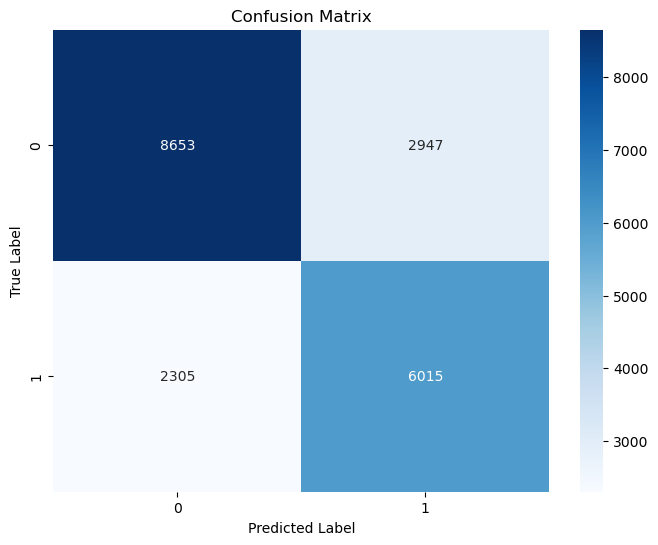

In [41]:
# Cell 6: Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
# Cell 3: Helper functions for boosting
def compute_weights(y_true, y_pred, weights):
    """Compute weights and alpha for boosting"""
    epsilon = 1e-10  # Small constant to prevent division by zero
    incorrect = (y_true != y_pred)
    
    # Calculate weighted error
    error = np.sum(weights * incorrect) / np.sum(weights)
    error = np.clip(error, epsilon, 1 - epsilon)  # Prevent log(0)
    
    # Calculate alpha (importance of classifier)
    alpha = 0.5 * np.log((1 - error) / error)
    
    # Update weights
    weights = weights * np.exp(alpha * incorrect)
    weights = weights / np.sum(weights)  # Normalize
    
    return weights, alpha

def weighted_subsample(X, y, weights):
    """Create a weighted subsample of the dataset"""
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, p=weights)
    return X[indices], y[indices]

In [43]:
# Cell 4: Training function
def train_boosting(X, y, n_estimators=50, learning_rate=0.1):
    """Train boosting ensemble"""
    n_samples = X.shape[0]
    weights = np.ones(n_samples) / n_samples
    
    classifiers = []
    alphas = []
    
    for _ in range(n_estimators):
        # Get weighted subsample
        X_subset, y_subset = weighted_subsample(X, y, weights)
        
        # Train base classifier
        clf = DecisionTreeClassifier(max_depth=3)
        clf.fit(X_subset, y_subset)
        
        # Make predictions
        predictions = clf.predict(X)
        
        # Update weights and get alpha
        weights, alpha = compute_weights(y, predictions, weights)
        
        # Store classifier and its importance
        classifiers.append(clf)
        alphas.append(alpha * learning_rate)
    
    return classifiers, alphas

In [44]:
# Cell 5: Prediction functions
def predict_boosting(classifiers, alphas, X):
    """Make predictions using boosting ensemble"""
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    
    for clf, alpha in zip(classifiers, alphas):
        predictions += alpha * clf.predict(X)
    
    return (predictions > 0).astype(int)

def predict_proba_boosting(classifiers, alphas, X):
    """Get probability predictions"""
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    
    for clf, alpha in zip(classifiers, alphas):
        predictions += alpha * clf.predict(X)
    
    probas = 1 / (1 + np.exp(-2 * predictions))
    return np.vstack([1 - probas, probas]).T

In [49]:
# Cell 1: Train the boosting model
classifiers, alphas = train_boosting(X_train.values, y_train.values, n_estimators=50)

# Make predictions
y_pred = predict_boosting(classifiers, alphas, X_test.values)

In [50]:
# Cell 2: Print classification metrics
print("Boosting Model Performance Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Boosting Model Performance Metrics:

Accuracy Score: 0.4234939759036145

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.01      0.02     11600
           1       0.42      1.00      0.59      8320

    accuracy                           0.42     19920
   macro avg       0.71      0.50      0.31     19920
weighted avg       0.75      0.42      0.26     19920



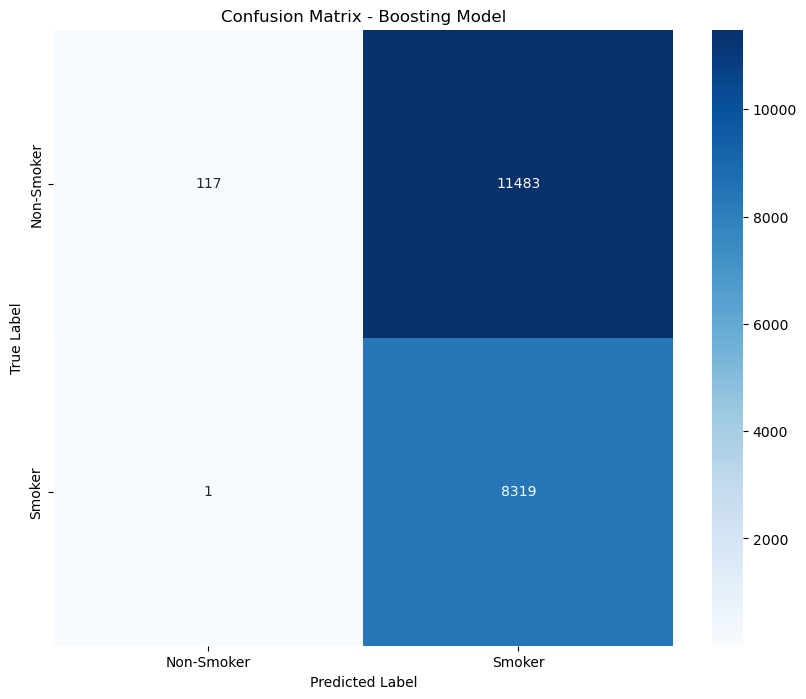


Confusion Matrix Interpretation:
True Negatives: 117
False Positives: 11483
False Negatives: 1
True Positives: 8319


In [51]:
# Cell 3: Create and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])

plt.title('Confusion Matrix - Boosting Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives: {conf_matrix[0,0]}")
print(f"False Positives: {conf_matrix[0,1]}")
print(f"False Negatives: {conf_matrix[1,0]}")
print(f"True Positives: {conf_matrix[1,1]}")

c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier 

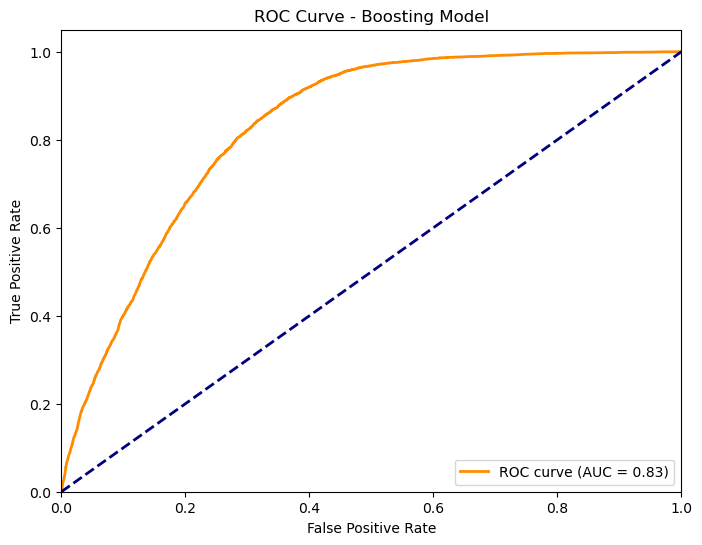

In [52]:
# Cell 4: Additional visualization - ROC Curve
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_pred_proba = predict_proba_boosting(classifiers, alphas, X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Boosting Model')
plt.legend(loc="lower right")
plt.show()

In [53]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Cell 4: Random Forest class
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        
        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            
            # Handle pandas DataFrame/Series properly
            if isinstance(X, pd.DataFrame):
                sample_X = X.iloc[indices]
            else:
                sample_X = X[indices]
                
            if isinstance(y, pd.Series):
                sample_y = y.iloc[indices]
            else:
                sample_y = y[indices]
            
            # Create and train decision tree
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=None
            )
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])

In [ ]:
# Cell 5: Data preprocessing
# Load and preprocess data
#data = pd.read_csv('your_data.csv')


X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [56]:
# Cell 6: Train Random Forest
# Initialize and train the random forest
rf_classifier = RandomForest(n_trees=100, max_depth=10)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_valid_pred = rf_classifier.predict(X_valid_scaled)


In [57]:
# Cell 7: Classification Report
# Print classification report
print("Classification Report:")
print(classification_report(y_valid, y_valid_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.61      0.71     13359
           1       0.63      0.85      0.73     10529

    accuracy                           0.72     23888
   macro avg       0.74      0.73      0.72     23888
weighted avg       0.75      0.72      0.72     23888




Confusion Matrix:
[[8157 5202]
 [1556 8973]]


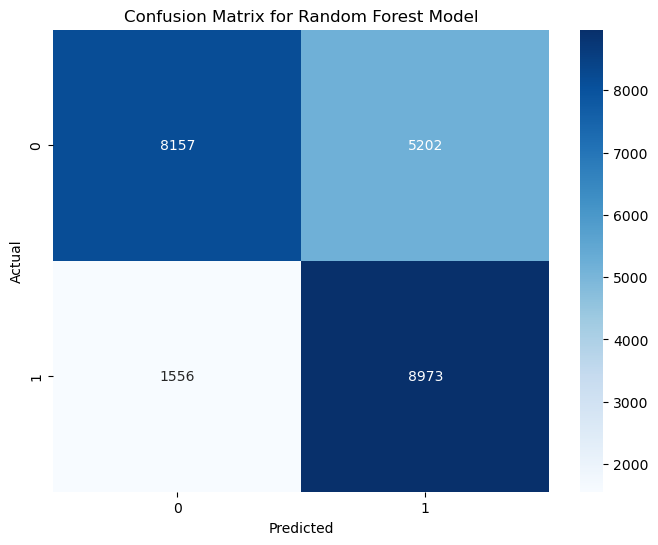

In [58]:
# Cell 8: Confusion Matrix
# Calculate and display confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# Base model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search Accuracy: 0.719075725229185


In [ ]:
from scipy.stats import randint

# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from Randomized Search: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 180}
Randomized Search Accuracy: 0.7172757336012391


Confusion Matrix for Random Forest Model:
[[8997 4362]
 [2703 7826]]


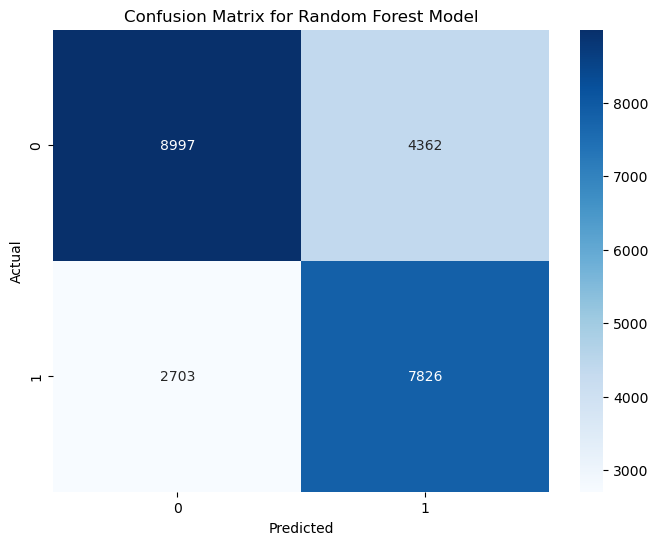

In [ ]:
from sklearn.metrics import confusion_matrix

# Fit the model if it is not already fitted
if not hasattr(model, "estimators_"):
	model.fit(X_train, y_train)

# Generate predictions for the validation set
y_valid_pred_rf = model.predict(X_valid)

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)

# Display the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [80]:
# Base model
boosting_model = GradientBoostingClassifier(random_state=42)

In [ ]:
# Simplified Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=boosting_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Grid Search Accuracy: 0.72246640713299


In [ ]:
# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=boosting_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters from Randomized Search: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 142, 'subsample': 1.0}
Randomized Search Accuracy: 0.7193268868516891


Confusion Matrix for Gradient Boosting Model:
[[8459 4900]
 [1826 8703]]


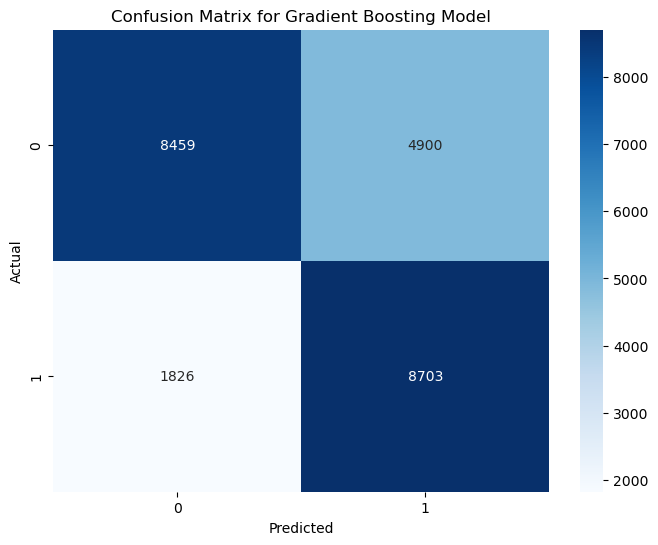

In [81]:
from sklearn.metrics import confusion_matrix


# Fit the model on the training data
boosting_model.fit(X_train_scaled, y_train)

# Generate predictions for the validation set
y_valid_pred_boosting = boosting_model.predict(X_valid_scaled)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred_boosting)

# Display the confusion matrix
print("Confusion Matrix for Gradient Boosting Model:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

Random Forest Validation Accuracy: 0.7073007367716008
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     13359
           1       0.64      0.75      0.69     10529

    accuracy                           0.71     23888
   macro avg       0.71      0.71      0.71     23888
weighted avg       0.72      0.71      0.71     23888

Confusion Matrix for Random Forest Model:
[[9023 4336]
 [2656 7873]]


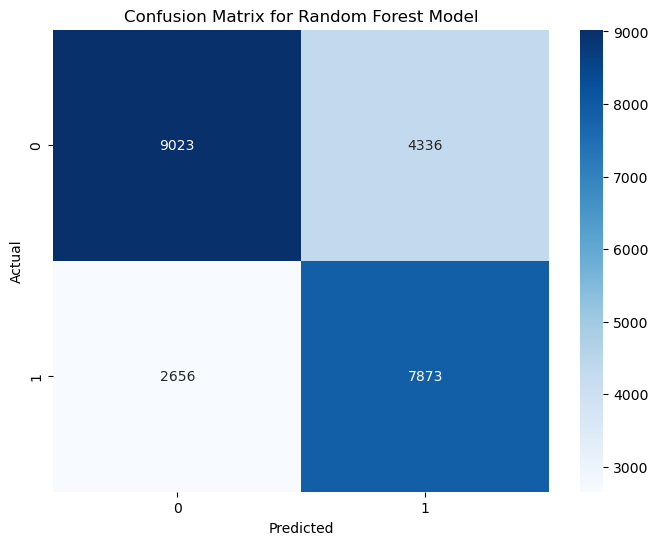

In [ ]:
# Drop the specified columns
data = data.drop(columns=['hearing(left)', 'id', 'Urine protein'])

# Preprocess the data
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train the model again 
boosting_model = RandomForestClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_valid_pred_rf = boosting_model.predict(X_valid_scaled)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f'Random Forest Validation Accuracy: {valid_accuracy_rf}')
print(classification_report(y_valid, y_valid_pred_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()